#### Simon Gamboa, 2023


# Developing a higher-performance model based on Deep Neural Network to predict CO2 Emissions in Canadian Vehicles from 2017 - 2023

__- Flaming the problem__

In Canada, 27 percent of greenhouse gas (GHG) emissions come from the transportation sector. Nearly half of this is from light-duty vehicles - the cars, vans and light trucks we drive. Although car manufacturers have managed to reduce emissions of criteria air pollutants (CACs) from cars and light trucks, fuel consumption and carbon dioxide (CO2) emissions have steadily increased over the past two decades. That is because CO2 is an unavoidable by-product of burning fossil fuels. CO2 is the primary greenhouse gas linked to climate change. Although light-duty vehicles are more fuel efficient than they were in the 1970s, there are many more vehicles on the road today, and we're driving them farther than before, using more fuel. While much of the energy used in Canada is necessary, there are times when we could use energy more wisely (Government of Canada, 2010).

__- Dataset__

We obtained a database from Natural Resources Canada's Open Government Licence - Canada  providing a comparison of various manufacturers and vehicle types based on fuel economy and CO2 emissions. To guarantee accuracy and consistency, we took considerable care to clean and integrate these datasets. We were able to acquire trustworthy data using this rigorous process, which served as the foundation for our following machine learning and deep learning task.

Dataset Reference
- https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

Note:
__Model year 2017 update__
Some of the calculations used by manufacturers to determine the fuel consumption ratings of their new vehicles were updated. This better reflects today's more fuel-efficient technologies such as hybrid vehicles and turbocharged engines. The ratings for a 2017 or later model may be slightly different from the model year 2016 ratings for the same vehicle.

__-machine learning pipeline__

	- Wrangling and Cleaning
    - EDA
    - Dummy variables
    - Feature Engineering
    	- Feature Select
        - Feature Scale
    - Regression Modelling
    	- Tunning Alpha parameter
        - Pipeline with GridSerachCV and k-fold cross validation
    - Deep Neural Network modelling
    	- Tunning L2 regularization and Epoch
        - Compile
        - Evaluation Model
    - Out-of-sample Predictions
    - Developing Initial Hypotheses


# 1. Load Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

# 2. Read Dataset

In [2]:
df = pd.read_csv('Fuel_Consumption_2012_2022.csv')
df

,Year,Make,Model,Vehicle Class,Type Vehicle,Motor kW,Engine Size,Cylinders,Transmission,Electric Type,Comb kWh 100km,Fuel Type,City L 100km,Hwy L 100km,Comb L 100km,CO2 Emissions,CO2 Rating,Smog Rating,City kWh 100km,Hwy kWh 100km
0,2022,Audi,e-tron 55 quattro,SUV Standard,EV,300.0,NaN,NaN,A1,B,27.0,NaN,3.0,3.0,3.0,0,10.0,10.0,26.9,27.0
1,2022,Audi,e-tron Sportback 55 quattro,SUV Standard,EV,300.0,NaN,NaN,A1,B,27.3,NaN,3.1,3.0,3.1,0,10.0,10.0,27.6,27.0
2,2022,Audi,"e-tron S Sportback quattro (20"" Wheels)",SUV Standard,EV,370.0,NaN,NaN,A1,B,27.9,NaN,3.2,3.0,3.1,0,10.0,10.0,28.6,27.0
3,2022,Audi,"e-tron S Sportback quattro (21"" or 22"" Wheels)",SUV Standard,EV,370.0,NaN,NaN,A1,B,32.4,NaN,3.7,3.6,3.6,0,10.0,10.0,32.9,31.7
4,2022,Audi,e-tron GT,Mid Size,EV,390.0,NaN,NaN,A2,B,25.6,NaN,2.9,2.8,2.9,0,10.0,10.0,25.9,25.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12005,2012,Volvo,XC70 3.2,SUV Standard,Fuel,NaN,3.2,6.0,AS6,NaN,NaN,X,11.2,7.8,9.7,223,NaN,NaN,NaN,NaN
12006,2012,Volvo,XC70 3.2 AWD,SUV Standard,Fuel,NaN,3.2,6.0,AS6,NaN,NaN,X,11.6,8.2,10.0,230,NaN,NaN,NaN,NaN
12007,2012,Volvo,XC70 T6 AWD,SUV Standard,Fuel,NaN,3.0,6.0,AS6,NaN,NaN,X,12.1,8.5,10.5,242,NaN,NaN,NaN,NaN
12008,2012,Volvo,XC90 3.2,SUV Standard,Fuel,NaN,3.2,6.0,AS6,NaN,NaN,X,12.9,8.7,11.0,253,NaN,NaN,NaN,NaN


In [3]:
# Get info from Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12010 entries, 0 to 12009
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            12010 non-null  int64  
 1   Make            12010 non-null  object 
 2   Model           12010 non-null  object 
 3   Vehicle Class   12010 non-null  object 
 4   Type Vehicle    12010 non-null  object 
 5   Motor kW        528 non-null    float64
 6   Engine Size     11699 non-null  float64
 7   Cylinders       11699 non-null  float64
 8   Transmission    12010 non-null  object 
 9   Electric Type   528 non-null    object 
 10  Comb kWh 100km  528 non-null    float64
 11  Fuel Type       11699 non-null  object 
 12  City L 100km    12010 non-null  float64
 13  Hwy L 100km     12010 non-null  float64
 14  Comb L 100km    12010 non-null  float64
 15  CO2 Emissions   12010 non-null  int64  
 16  CO2 Rating      7645 non-null   float64
 17  Smog Rating     6492 non-null  

# 3. Data Cleaning and Wrangling

In [5]:
# Checking columns Names
df.columns

Index(['Year', 'Make', 'Model', 'Vehicle Class', 'Type Vehicle', 'Motor kW',
       'Engine Size', 'Cylinders', 'Transmission', 'Electric Type',
       'Comb kWh 100km', 'Fuel Type', 'City L 100km', 'Hwy L 100km',
       'Comb L 100km', 'CO2 Emissions', 'CO2 Rating', 'Smog Rating',
       'City kWh 100km', 'Hwy kWh 100km'],
      dtype='object')

## 3.1 Change all column names

In [6]:
#Column name manipulation
#Replace whitespace in column names into underscore
#Change all column names into lowercase
df.columns = df.columns.str.lower() 
df.columns = df.columns.map(lambda x: x.replace(' ', '_').replace('-','_')) 
df.columns

Index(['year', 'make', 'model', 'vehicle_class', 'type_vehicle', 'motor_kw',
       'engine_size', 'cylinders', 'transmission', 'electric_type',
       'comb_kwh_100km', 'fuel_type', 'city_l_100km', 'hwy_l_100km',
       'comb_l_100km', 'co2_emissions', 'co2_rating', 'smog_rating',
       'city_kwh_100km', 'hwy_kwh_100km'],
      dtype='object')

## 3.2 Subset data from 2017 to 2022 

In [7]:
# subset year from 2017 to 2022
df = df[(df['year'] >= 2017) & (df['year'] <= 2022)]
df['year'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017], dtype=int64)

## 3.3  Subseting values and select only Fuel gasoline vehicles

In [8]:
# Subseting values and select only Fuel gasoline vehicles
df = df[df['type_vehicle'] == 'Fuel']
df['type_vehicle'].value_counts()

Fuel    6061
Name: type_vehicle, dtype: int64

## 3.4 Deleting unnecesaries variables

In [9]:
#Deleting unnecesaries variables such as Electric car and hybrid
df = df.drop(['make', 'model', 'type_vehicle','motor_kw','electric_type','comb_kwh_100km','city_kwh_100km','hwy_kwh_100km'], axis=1)
df.reset_index(drop=True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6061 entries, 0 to 6060
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6061 non-null   int64  
 1   vehicle_class  6061 non-null   object 
 2   engine_size    6061 non-null   float64
 3   cylinders      6061 non-null   float64
 4   transmission   6061 non-null   object 
 5   fuel_type      6061 non-null   object 
 6   city_l_100km   6061 non-null   float64
 7   hwy_l_100km    6061 non-null   float64
 8   comb_l_100km   6061 non-null   float64
 9   co2_emissions  6061 non-null   int64  
 10  co2_rating     6061 non-null   float64
 11  smog_rating    6061 non-null   float64
dtypes: float64(7), int64(2), object(3)
memory usage: 568.3+ KB


## 3.5 Checking missing values

In [10]:
df.isna().sum()

year             0
vehicle_class    0
engine_size      0
cylinders        0
transmission     0
fuel_type        0
city_l_100km     0
hwy_l_100km      0
comb_l_100km     0
co2_emissions    0
co2_rating       0
smog_rating      0
dtype: int64

## 3.6 Formating column values

In [11]:
#Convert column values
df['co2_emissions'] = df['co2_emissions'].astype('float64') #CO2 Emission is g/km
df['co2_rating'] = df['co2_rating'].astype('int64') #CO2 Rating is a scale value from 1 to 10, being 10 the best
df['smog_rating'] = df['smog_rating'].astype('int64')##CO2 Rating is a scale value from 1 to 10, being 10 the best

# 4. Exploration Data Analysis (EDA)

## 4.1 Visualizing the relationships between different variables relate to CO2 Emissions in the dataset

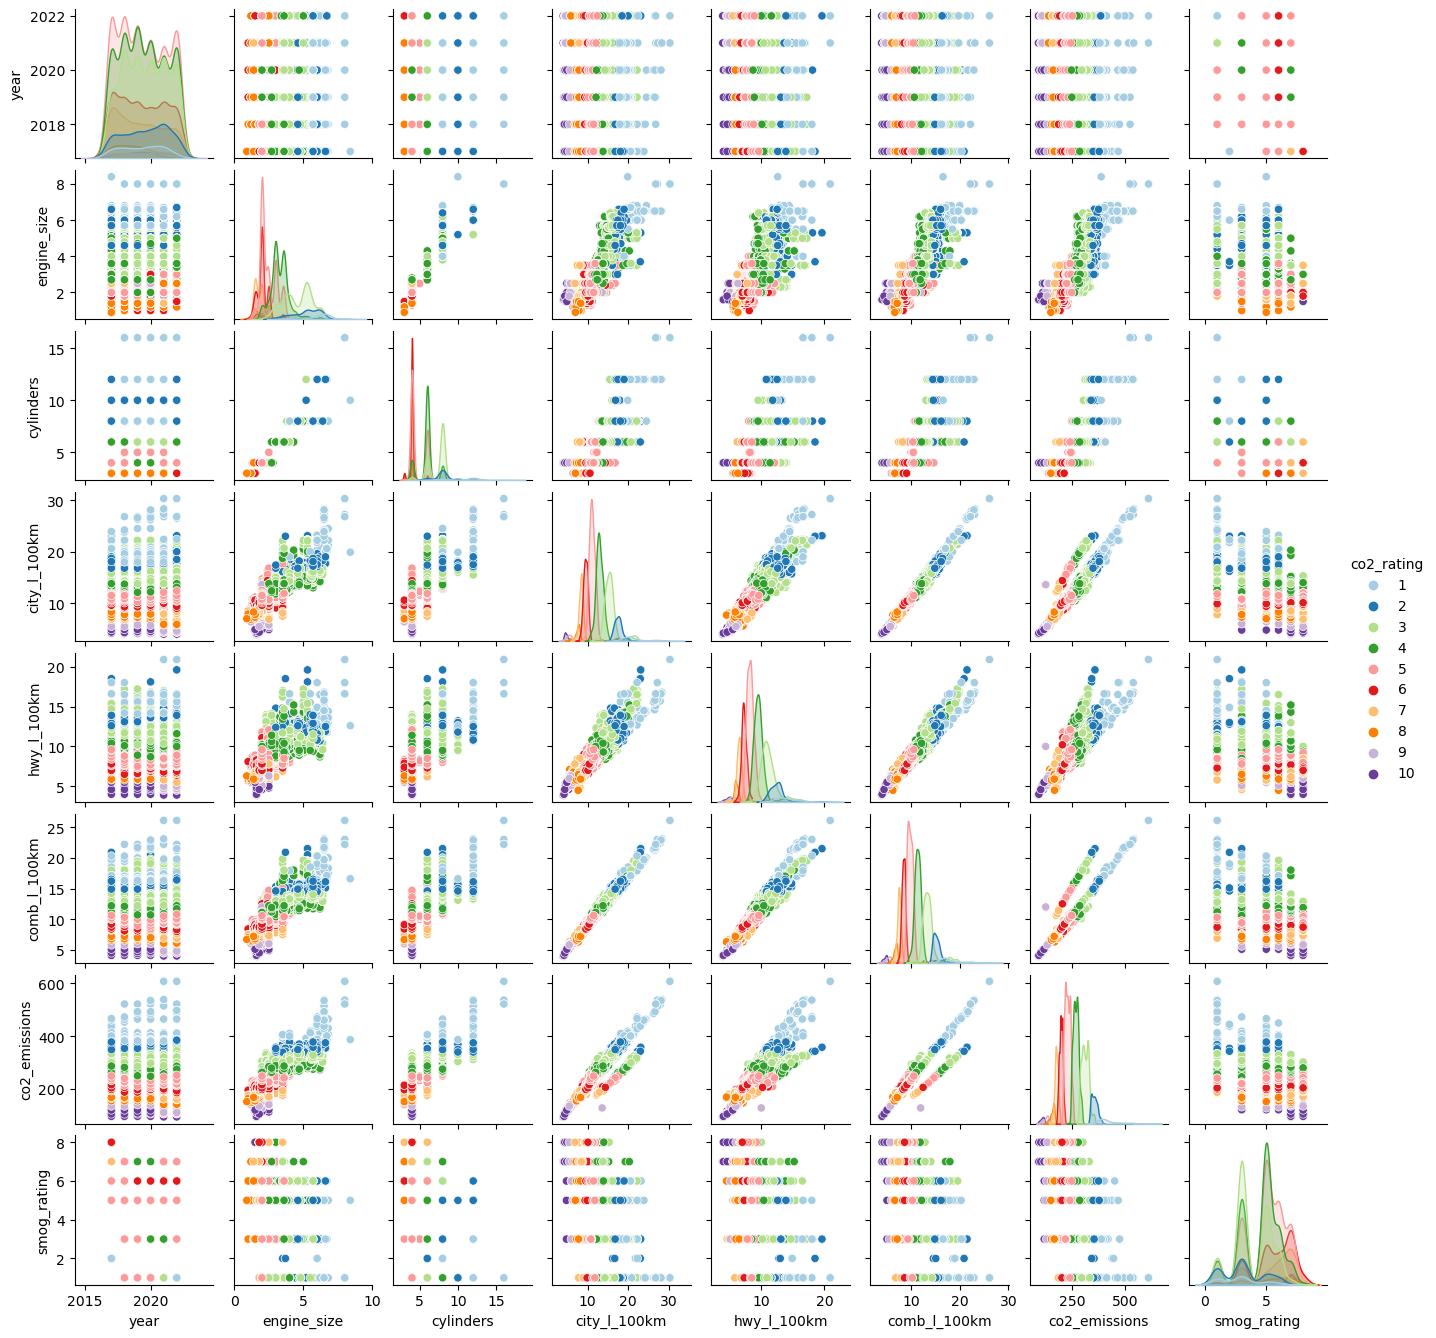

In [12]:
co2_rating_emissions = sns.pairplot(df, hue='co2_rating', palette='Paired', height=1.7)
plt.show()

## 4.2 Analyzing correlations between variables relate to CO2 Emissions

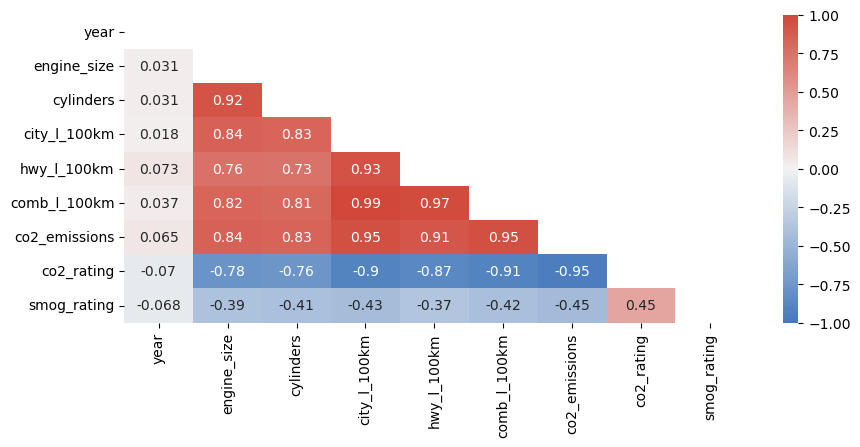

In [13]:
corr = df.corr()
# create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# configure a custom diverging colormap
cmap = sns.diverging_palette(250, 15, as_cmap=True)

# plot the heatmap with annotations and the upper triangle mask
plt.figure(figsize=(10, 4))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, mask=mask, cmap=cmap)
plt.show()

By analysing the heatmap, we can observe that there exist certain robust positive correlation, which are represented by red cell, as well as strong negative correlations, which are represented by blue cells. however, those variables that are not correlated are denoted by white cells. As per the heatmap findings, the variable "year" lacks any associtation with other variables, and hence it will be excluded.

## 4.3 Eliminate uncorrelated variables

In [14]:
#Deleting unnecesaries variables such as Electric car and hybrid
df = df.drop(['year'], axis=1)
df.reset_index(drop=True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6061 entries, 0 to 6060
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   vehicle_class  6061 non-null   object 
 1   engine_size    6061 non-null   float64
 2   cylinders      6061 non-null   float64
 3   transmission   6061 non-null   object 
 4   fuel_type      6061 non-null   object 
 5   city_l_100km   6061 non-null   float64
 6   hwy_l_100km    6061 non-null   float64
 7   comb_l_100km   6061 non-null   float64
 8   co2_emissions  6061 non-null   float64
 9   co2_rating     6061 non-null   int64  
 10  smog_rating    6061 non-null   int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 521.0+ KB


## 4.4 Checking data distribution

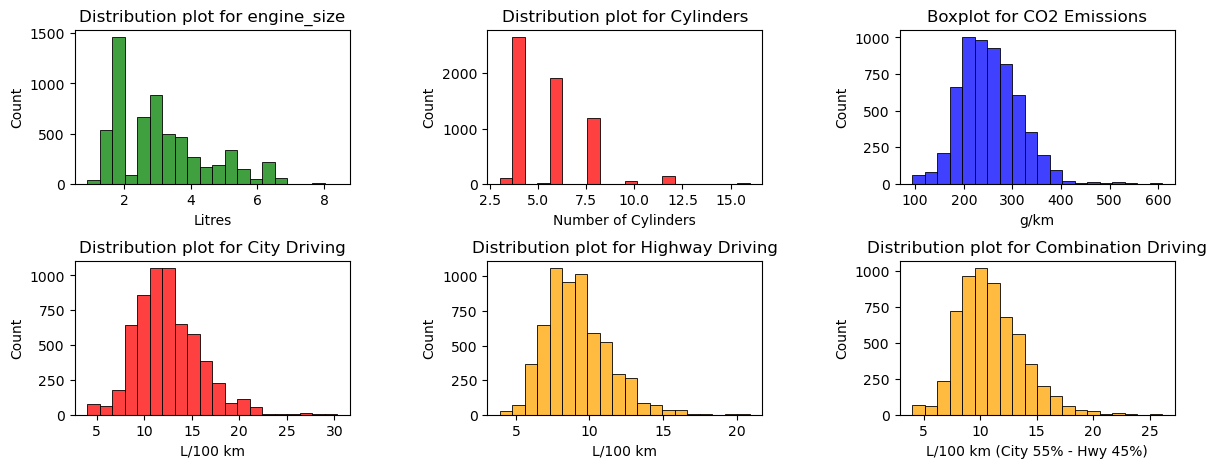

In [15]:
fig = plt.figure(figsize=(8,8)) #Create the figure for all the subplots
ax1 = fig.add_subplot(331) #Give each subplot a set within the grid
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)

#Create the subplots
sns.histplot(df['engine_size'], color='g', bins=20, ax= ax1) 
sns.histplot(df['cylinders'], color = 'r', bins = 20, ax=ax2)
sns.histplot(df['co2_emissions'], color='b', bins=20, ax= ax3) 
sns.histplot(df['city_l_100km'], color = 'r', bins = 20, ax=ax4)
sns.histplot(df['hwy_l_100km'], color = 'orange', bins = 20, ax=ax5)
sns.histplot(df['comb_l_100km'], color = 'orange', bins = 20, ax=ax6)

#General subplot spacing
plt.subplots_adjust(wspace=0.5, hspace=0.5, right=1.5)

#Individual subplot labels and format
ax1.set_title("Distribution plot for engine_size")
ax1.set_xlabel("Litres")

ax2.set_title("Distribution plot for Cylinders")
ax2.set_xlabel("Number of Cylinders")

ax3.set_title("Boxplot for CO2 Emissions")
ax3.set_xlabel("g/km")

ax4.set_title("Distribution plot for City Driving")
ax4.set_xlabel("L/100 km")

ax5.set_title("Distribution plot for Highway Driving")
ax5.set_xlabel("L/100 km")

ax6.set_title("Distribution plot for Combination Driving")
ax6.set_xlabel("L/100 km (City 55% - Hwy 45%)")

plt.show()

## 4.5 Evaluate the spread of the data in some variables

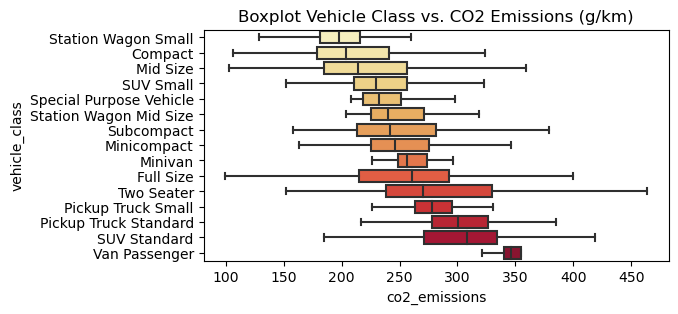

In [16]:
fig = plt.figure(figsize=(6,3))
order = df.groupby('vehicle_class')['co2_emissions'].median().sort_values().index
sns.boxplot(x = 'co2_emissions', y='vehicle_class', 
            data = df, order=order, 
            palette="YlOrRd", 
            showfliers = False).set_title('Boxplot Vehicle Class vs. CO2 Emissions (g/km)')
plt.show()

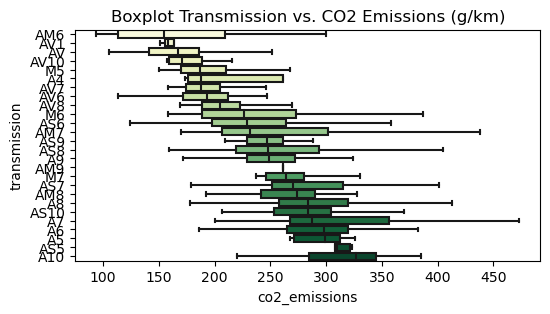

In [17]:
fig = plt.figure(figsize=(6,3))
order = df.groupby('transmission')['co2_emissions'].median().sort_values().index
sns.boxplot(x = 'co2_emissions', y='transmission', 
            data = df, order=order, palette="YlGn", 
            showfliers = False).set_title('Boxplot Transmission vs. CO2 Emissions (g/km)')
plt.show()

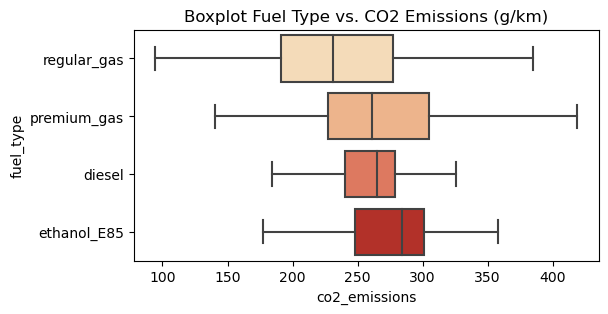

In [18]:
#Rename row values
rename_dict = {'Z': 'premium_gas',
              'X': 'regular_gas',
              'D': 'diesel',
              'E': 'ethanol_E85',}
df = df.replace(rename_dict)

fig = plt.figure(figsize=(6,3))

order = df.groupby('fuel_type')['co2_emissions'].median().sort_values().index
sns.boxplot(x = 'co2_emissions', y='fuel_type', 
            data = df, order=order, palette="OrRd", 
            showfliers = False).set_title('Boxplot Fuel Type vs. CO2 Emissions (g/km)')
plt.show()

# 4.6 Summary statistics of the data

In [19]:
df.describe()

,engine_size,cylinders,city_l_100km,hwy_l_100km,comb_l_100km,co2_emissions,co2_rating,smog_rating
count,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000
mean,3.149744,5.636529,12.444729,9.137766,10.955700,254.001815,4.558819,4.674311
std,1.356652,1.901722,3.396537,2.146115,2.792607,60.544380,1.636843,1.791209
min,0.900000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000,1.000000
25%,2.000000,4.000000,10.100000,7.600000,9.000000,211.000000,3.000000,3.000000
50%,3.000000,6.000000,12.100000,8.900000,10.600000,249.000000,4.000000,5.000000
75%,3.700000,6.000000,14.500000,10.400000,12.600000,293.000000,5.000000,6.000000
max,8.400000,16.000000,30.300000,20.900000,26.100000,608.000000,10.000000,8.000000


# 5. Creating dummy variables

In [20]:
df = pd.get_dummies(df, drop_first=True)

In [21]:
from sklearn.feature_selection import VarianceThreshold, SelectFromModel, mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC

#The target will be the car emissions
X = df.drop(["co2_emissions"],axis=1) #feature
y = df['co2_emissions'] #target


In [22]:
print('features: ', X.shape)
print('target:   ', y.shape)

features:  (6061, 49)
target:    (6061,)


# 6. Feature selection models

- SelectFromModel()
- SelectKBest()

In [23]:
feature_selec = []
shape_df = []

#Logitic Regression
logreg = SelectFromModel(estimator=LogisticRegression(max_iter=500)).fit(X, y)
X_lr = X.iloc[:, logreg.get_support(indices=True)]
feature_selec.append("LogisticRegression")
shape_df.append(X_lr.shape[1])

#LinearSVC
lsvc = SelectFromModel(estimator=LinearSVC(C=0.001)).fit(X, y)
X_svc = X.iloc[:, lsvc.get_support(indices=True)]
feature_selec.append("LinearSVC")
shape_df.append(X_svc.shape[1])

#Featuring selection model with SelectKBest()
kbest = SelectKBest(score_func = mutual_info_classif, k=10).fit(X, y)
X_Kbest = X.iloc[:,kbest.get_support(indices=True)]
feature_selec.append("SelectKBest")
shape_df.append(X_Kbest.shape[1])

#RandomForestClassifier
rf = SelectFromModel(estimator=RandomForestClassifier(n_estimators = 100)).fit(X, y)
X_rf = X.iloc[:, rf.get_support(indices=True)]
feature_selec.append("RandomForestClassifier")
shape_df.append(X_rf.shape[1])


#Feature Selection results
result = np.vstack((feature_selec, shape_df)).T
result_df = pd.DataFrame(result, columns=['feature selection method', '# features'])
#result_df.sort_values(by=['# features'], ascending=False)
feature_selection_step_4 = result_df.sort_values(by=['# features'], ascending=False)
feature_selection_step_4

,feature selection method,# features
1,LinearSVC,7
3,RandomForestClassifier,6
0,LogisticRegression,22
2,SelectKBest,10


## 6.1 SelectFromModel with RandonForestClassifier as best Feature Selection

In [24]:
#X_rf.info()
print('features: ', X_rf.shape)
print('target:   ', y.shape)

features:  (6061, 6)
target:    (6061,)


## 6.2  Save the new features

In [25]:
# Saving the RandomForestClassifier feature selected dataset as csv file named feature1
X_rf.to_csv('feature1.csv')

# 7. Evaluate multiples scaler with cross-validations to select the best model based on RandomForest regressor

In [26]:
np.random.seed(42)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rf, y, test_size=0.25, random_state=42)

# Define the scalers to evaluate
scalers = [("RobustScaler", RobustScaler()),
           ("StandardScaler", StandardScaler()),
           ("MinMaxScaler", MinMaxScaler()),
           ("MaxAbsScaler", MaxAbsScaler()),
           ("PowerTransformer", PowerTransformer()),
           ("QuantileTransformer", QuantileTransformer())]

# Define the pipeline to evaluate the different scalers
pipeline = Pipeline(steps=[('scaler', None),
                           ('regressor', RandomForestClassifier(n_estimators = 100, max_depth=5))])

# Define a dictionary to keep track of the scores for each scaler
scores = {}

# Evaluate each scaler
for name, scaler in scalers:
    pipeline.set_params(scaler=scaler)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    score = r2_score(y_test, y_pred)
    scores[name] = score
    print(f"{name} r2_score: {score}")

# Select the best scaler based on the evaluation metric
best_scaler = max(scores, key=scores.get)
print()
print('-----------------------------------------------------------------------')
print(f"The best scaler is {best_scaler} with a score of {scores[best_scaler]}")
print('-----------------------------------------------------------------------')

RobustScaler r2_score: 0.9391922276778949
StandardScaler r2_score: 0.9416052301708581
MinMaxScaler r2_score: 0.9274759709054138
MaxAbsScaler r2_score: 0.9428832710465366
PowerTransformer r2_score: 0.9287479893123078
QuantileTransformer r2_score: 0.9210299218164747

-----------------------------------------------------------------------
The best scaler is MaxAbsScaler with a score of 0.9428832710465366
-----------------------------------------------------------------------


__Based on the r2_score results__, the MinMaxScaler and RobustScaler perform the best, with r2_scores of 0.9678 and 0.9653, respectively. These two scalers are likely the best choice for scaling the data in this case. However, the scaler results could change in each code run!

## 7.1 Read dataset from the new features

In [27]:
feature1 = pd.read_csv('feature1.csv')
feature1 = feature1.drop(['Unnamed: 0'], axis=1)
feature1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6061 entries, 0 to 6060
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine_size   6061 non-null   float64
 1   city_l_100km  6061 non-null   float64
 2   hwy_l_100km   6061 non-null   float64
 3   comb_l_100km  6061 non-null   float64
 4   co2_rating    6061 non-null   int64  
 5   smog_rating   6061 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 284.2 KB


In [28]:
feature1.head()

,engine_size,city_l_100km,hwy_l_100km,comb_l_100km,co2_rating,smog_rating
0,2.4,9.9,7.0,8.6,6,3
1,3.5,12.6,9.4,11.2,4,5
2,2.0,11.0,8.6,9.9,5,6
3,2.0,11.3,9.1,10.3,5,6
4,2.0,11.2,8.0,9.8,5,7


In [29]:
y.head()

122    200.0
123    263.0
124    232.0
125    242.0
126    230.0
Name: co2_emissions, dtype: float64

# 8. Regression Modelling

In [30]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## 8.1 Select best Alpha parameters to Ridge and Lasso Regression

### 8.1.1 Alphas Ridge Regression

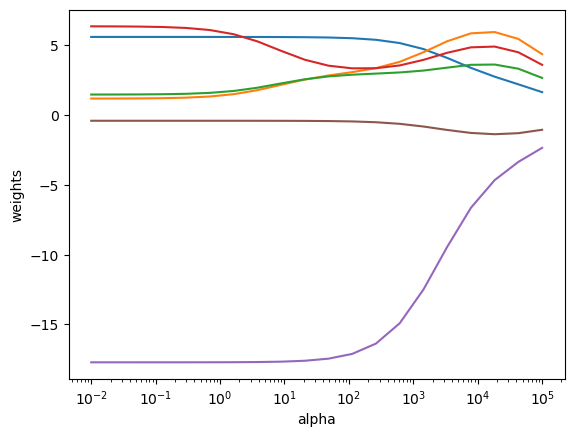

-------------------------------------------------------
Top 5 best Alphas Ridge values


,Alphas,R2 Train,R2 Test,RMSE
12,3.792690,0.951635,0.952681,13.077956
13,1.623777,0.951636,0.952680,13.078024
14,0.695193,0.951636,0.952679,13.078132
11,8.858668,0.951633,0.952679,13.078139
15,0.297635,0.951636,0.952679,13.078206


In [31]:
from sklearn.linear_model import Ridge, Lasso
# Load or generate your data here
X = feature1
y = df["co2_emissions"]

#Split the data in training and test subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Tuning alpha parameter in RIDGE linear model

alphas_rdg = 10**np.linspace(5, -2, 20)

ridge = Ridge()
coefs = []

for a in alphas_rdg:
    ridge.set_params(alpha = a)
    ridge.fit(X,y)
    coefs.append(ridge.coef_)

np.shape(coefs)

#The weight of each parameter based on the alpha values
plt.plot(alphas_rdg, coefs)
ax = plt.gca()
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

#Finding the optimal alpha value to the Ridge regression

rmse_list_alpha = []
r2_list_alpha = []
r2_train_list_alpha = []

for a in alphas_rdg:
    ridge = Ridge(alpha = a, max_iter=1000)
    ridge.fit(X_train, Y_train)
    pred = ridge.predict(X_test)
    
    r2_train_list_alpha.append(ridge.score(X_train, Y_train))
    r2_list_alpha.append(ridge.score(X_test,Y_test))
    rmse = mean_squared_error(Y_test, pred)**0.5
    rmse_list_alpha.append(rmse)
    #print('RMSE: %.2f'% rmse)
ridge_result = np.vstack((alphas_rdg, r2_train_list_alpha, 
                          r2_list_alpha, rmse_list_alpha)).T
ridge_df = pd.DataFrame(ridge_result, columns=
                        ['Alphas','R2 Train', 'R2 Test', 'RMSE'])
print('-------------------------------------------------------')
print('Top 5 best Alphas Ridge values')
ridge_df.sort_values(by=['R2 Test'], ascending=False).head(5)

### 8.1.2 Alphas Lasso Regression

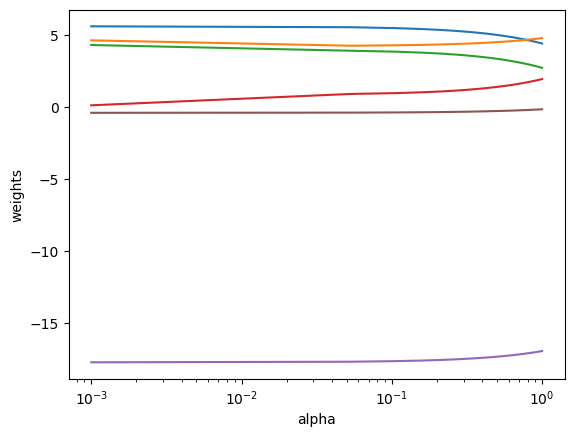

-------------------------------------------------------
Top 5 best Alphas Lasso values


,Alphas,R2 Train,R2 Test,rmse
19,0.001000,0.951612,0.952674,13.078860
18,0.053579,0.951619,0.952670,13.079439
17,0.106158,0.951615,0.952658,13.081038
16,0.158737,0.951608,0.952644,13.083030
15,0.211316,0.951599,0.952627,13.085413


In [32]:
#Split the data in training and test subsets
X_train_lss, X_test_lss, Y_train_lss, Y_test_lss = train_test_split(X, y, test_size = 0.25, random_state = 42)

alphas_lss = np.linspace(1, 0.001, 20)

# Tuning alpha parameter in LASSO linear model
lasso = Lasso()
coefs = []

for a in alphas_lss:
    lasso.set_params(alpha = a)
    lasso.fit(X,y)
    coefs.append(lasso.coef_)

np.shape(coefs)

# # The weight of each parameter based on the alpha values
plt.plot(alphas_lss, coefs)
ax = plt.gca()
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

#Finding the optimal alpha value to the Lasso regression
rmse_list_ls = []
r2_list_ls = []
r2_train_list_ls = []

for a in alphas_lss:
    lasso = Lasso(alpha = a, max_iter=1000)
    lasso.fit(X_train_lss, Y_train_lss)
    pred = lasso.predict(X_test_lss)
    
    r2_train_list_ls.append(lasso.score(X_train_lss, Y_train_lss))
    r2_list_ls.append(lasso.score(X_test_lss,Y_test_lss))
    rmse_ls = mean_squared_error(Y_test_lss, pred)**0.5
    rmse_list_ls.append(rmse_ls)
    #print('RMSE: %.2f'% rmse)
    
lasso_result = np.vstack((alphas_lss, r2_train_list_ls, r2_list_ls, rmse_list_ls)).T
lasso_df = pd.DataFrame(lasso_result, columns=['Alphas','R2 Train', 'R2 Test', 'rmse'])
print('-------------------------------------------------------')
print('Top 5 best Alphas Lasso values')
lasso_df.sort_values(by=['R2 Test'], ascending=False).head(5)

## 8.2 Regression Modelling Pipeline with k-fold cross validation

In [33]:
X = feature1
y = df["co2_emissions"]

#Split the data in training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#Scaler
scaler = RobustScaler()

#models
lss_reg = Lasso()
rdg_reg = Ridge()
linear_reg  = LinearRegression()
rf_reg  = RandomForestRegressor()

#Pipeline
lss_pipeline = Pipeline([('scaler', scaler), ('lasso', lss_reg)])
rdg_pipeline = Pipeline([('scaler', scaler), ('ridge', rdg_reg)])
linear_pipeline = Pipeline([('scaler', scaler), ('linear', linear_reg)])
rf_pipeline = Pipeline([('scaler', scaler), ('rf', rf_reg)])

# Step 4: Define the parameters for each classifier
lasso_params = {
    'lasso__alpha': [0.001000],
    'lasso__max_iter': [1000]
}

ridge_params = {
    'ridge__alpha': [0.010000],
    'ridge__max_iter': [1000]
}

linear_params = {}
rf_params = {'rf__n_estimators': [100], 'rf__max_depth': [5]}

#Define the pipelines and their respective parameters
pipelines = {"Lasso Regressor": [lss_pipeline, lasso_params],
             "Ridge Regresor": [rdg_pipeline, ridge_params],
             "LinearRegressor": [linear_pipeline, linear_params],
             "Random Forest Regressor": [rf_pipeline, rf_params],
            }

# Step 6: Loop over each pipeline and their respective parameters, and perform k-fold cross-validation on the training set

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}
best_score_1 = 0
for pipeline_name, pipeline_obj in pipelines.items():
    pipeline, params = pipeline_obj[0], pipeline_obj[1]
    grid_search = GridSearchCV(pipeline, params, cv=kfold)
    grid_search.fit(X_train, y_train)
    cv_results[pipeline_name] = grid_search.best_score_ #Mean cross-validated score of the best_estimator
    if grid_search.best_score_>best_score_1:
        best_score_1 = grid_search.best_score_
        grid_search_1 = grid_search

In [34]:
sorted_cv_results = dict(sorted(cv_results.items(), key=lambda item: item[1], reverse=True))
sorted_cv_results

{'Random Forest Regressor': 0.9883405132392156,
 'Ridge Regresor': 0.9514537646640882,
 'LinearRegressor': 0.9514532448967163,
 'Lasso Regressor': 0.9514463252104447}

## 8.3 Define the best regression models to be train and validated the models

R^2: 0.9526782513056422, Linear Regression - RMSE: 13.0782755348905
R^2: 0.9526782700035734, Ridge Regression - RMSE: 13.078272951123758
R^2: 0.9526740241982148, Lasso Regression - RMSE: 13.078859643071839
R^2: 0.9973835239948019, Random Forest Regression - RMSE: 3.0752361315652794

Best model: Random Forest Regression


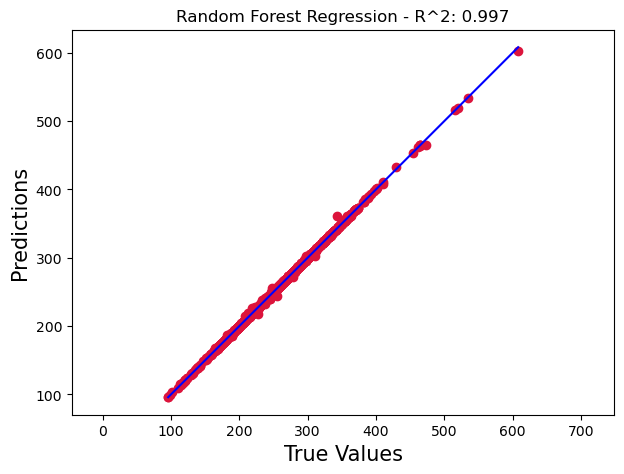

In [35]:
X = feature1
y = df["co2_emissions"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the regression models to be used in the pipeline
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha = 0.010000),
    'Lasso Regression': Lasso(alpha = 0.001000),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Create a function to train and validate the models
def train_and_validate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)**0.5
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Train and validate all the models and store their performance metrics
results = {}
for name, model in models.items():
    rmse, r2 = train_and_validate(model, X_train, y_train, X_test, y_test)
    results[name] = {'rmse': rmse, 'r2': r2}

# Print the performance metrics of all the models
for name, result in results.items():
    print(f'R^2: {result["r2"]}, {name} - RMSE: {result["rmse"]}')

# Identify the best model based on the R^2 score
best_model_name = max(results, key=lambda x: results[x]['r2'])
best_model = models[best_model_name]
print(f'\nBest model: {best_model_name}')

# Train the best model on the entire dataset
best_model.fit(X, y)
# Make predictions on the test data
y_pred = best_model.predict(X_test)

plt.figure(figsize=(7,5))
actual_values = y_test
plt.scatter(actual_values, y_pred, c='crimson')
p1 = max(max(y_pred), max(actual_values))
p2 = min(min(y_pred), min(actual_values))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title(f'{best_model_name} - R^2: {results[best_model_name]["r2"]:.3f}')
plt.axis('equal')
plt.show()

In [36]:
print('features: ', X.shape)
print('target:   ', y.shape)
print('pred:     ', y_pred.shape)
print('pred:     ', y_test.shape)

features:  (6061, 6)
target:    (6061,)
pred:      (1516,)
pred:      (1516,)


# 9. Deep Neural Network Using Keras

In [37]:
#%pip install tensorflow

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
import os

## 9.1 Create sets for training and testing

In [39]:
#Create sets for training and testing
X = feature1
y = df["co2_emissions"]

#split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, y,  test_size=0.25, random_state=42)
X_train.head(5)

,engine_size,city_l_100km,hwy_l_100km,comb_l_100km,co2_rating,smog_rating
2166,6.4,15.8,9.6,13.0,3,1
1634,4.0,15.1,9.2,12.4,3,5
4615,2.0,12.3,9.3,10.9,4,5
322,3.3,17.3,13.1,15.4,5,6
4397,5.3,19.8,13.9,17.2,3,3


In [40]:
#Checking the shape
print('features: ', X.shape)
print('target:   ', y.shape)

features:  (6061, 6)
target:    (6061,)


In [41]:
## 9.1 Normalization

In [42]:
#Normalization layer
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train).astype('float32'))
normalizer.adapt(np.array(X_train))

## 9.2 DNN model 1

In [43]:
# Define the L2 regularization coefficient
l2_reg = 0.01

# Update the model architecture to include L2 regularization in each layer
def build_compile_model(norm):
    model = keras.Sequential([
        norm, # Normalization layer
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)), # Dense hidden layer of 64 neurons with L2 regularization
        Dropout(0.2),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)), # Dense hidden layer of 32 neurons with L2 regularization
        Dropout(0.2),
        layers.Dense(1) # One output layer
    ])
    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
    return model

#Compile the model with normalization layer
dnn_model1 = build_compile_model(normalizer)
#Provide model summary
dnn_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 6)                13        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                448       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                        

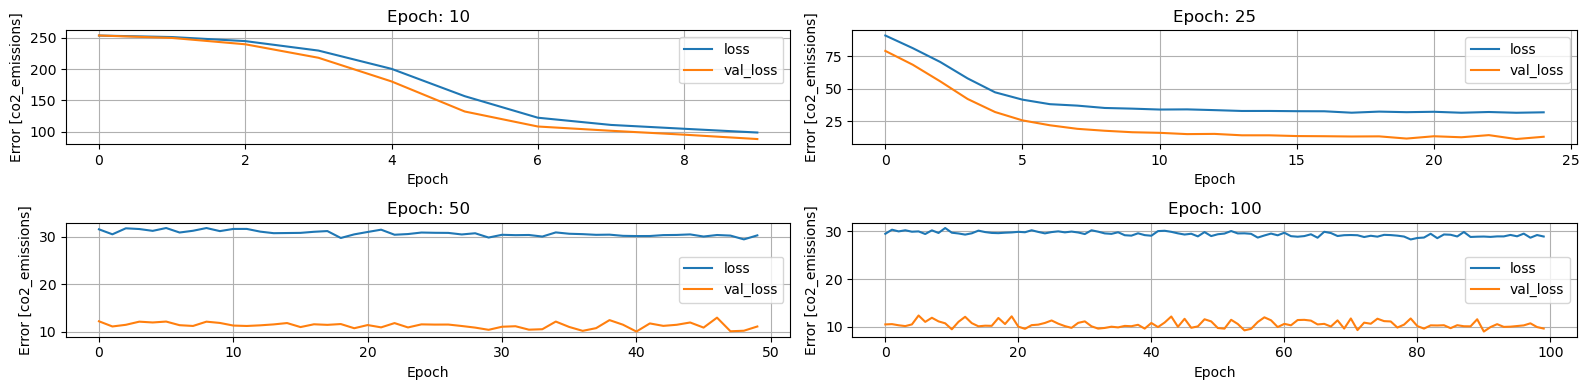

In [44]:
#Function for plotting
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [co2_emissions]')
    plt.legend()
    plt.grid(True)
    
#Set figure size
fig = plt.figure(figsize=(16,4))
i = 1

#Decided to do a loop to compare all the epochs and see the tendency as they increased
for x in [10, 25, 50, 100]: 
    history = dnn_model1.fit(X_train,
                            y_train, 
                            batch_size=100, 
                            verbose=0, 
                            epochs = x, 
                            validation_split=0.25
                            ) 
    
    ax = fig.add_subplot(2,2,i)
    plot_loss(history)
    title = "Epoch: " + str(x)
    ax.title.set_text(title)
    fig.tight_layout()
    
    i += 1

### 9.2.1 Compile model 1 using epochs = 25

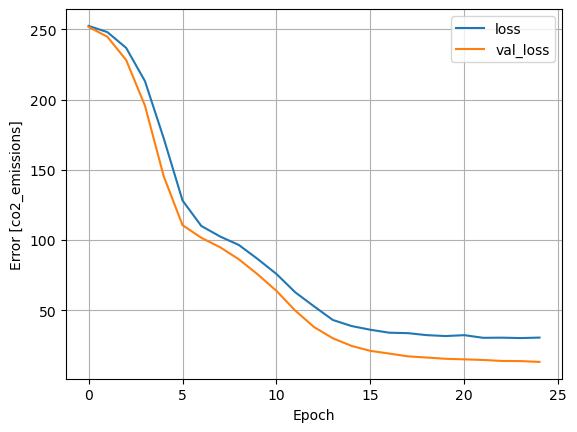

In [45]:
dnn_model1 = build_compile_model(normalizer)
history1 = dnn_model1.fit(X_train,
                         y_train, 
                         batch_size=100, 
                         verbose=0, 
                         epochs = 25, 
                         validation_split=0.25
                         ) 
plot_loss(history1)

In [46]:
#Evaluation of the model
dnn_model1.evaluate(X_test, y_test)

48/48 [==============================] - 0s 1ms/step - loss: 13.1037


13.103747367858887

In [47]:
#Get the predictions
test_predictions1 = dnn_model1.predict(X_test).flatten()

48/48 [==============================] - 0s 1ms/step


48/48 [==============================] - 0s 2ms/step - loss: 13.1037


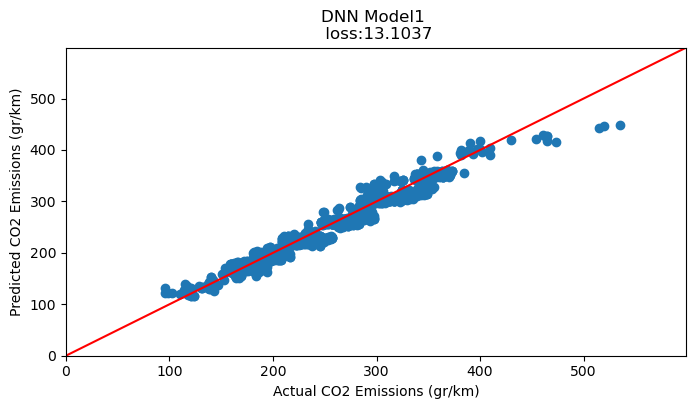

In [48]:
#Plot the actual vs the predicted
fig = plt.figure(figsize=(8, 4))
plt.scatter(y_test, test_predictions1)
plt.xlabel('Actual CO2 Emissions (gr/km)')
plt.ylabel('Predicted CO2 Emissions (gr/km)')
#Limit is dynamic and will be fixed based on max prediction plus a margin based on the minimum as to center the plot
lims = [0, max(test_predictions1) + min(test_predictions1)] 
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims, color='r')
plt.title(f'DNN Model1 \n loss:{dnn_model1.evaluate(X_test, y_test):.4f}')
plt.show()

### 9.3 Model 2 minimize the loss score

In [49]:
#DNN Sequential model
def build_compile_model(norm):
    model = keras.Sequential([
    norm, #Normalization layer
    layers.Dense(64, activation='relu'), #Dense hidden layer of 64 neurons
    layers.Dense(32, activation='relu'), #Dense hidden layer of 32 neurons
    layers.Dense(1) #One output layer
    ])
    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001)) #Used MEA
    
    return model

#Compile the model with normalization layer
dnn_model2 = build_compile_model(normalizer)
#Provide model summary
dnn_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 6)                13        
 n)                                                              
                                                                 
 dense_6 (Dense)             (None, 64)                448       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,574
Trainable params: 2,561
Non-trainable params: 13
_________________________________________________________________


In [50]:
#callback that saves weights only during training
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [51]:
# getting the weights of the first hidden layer
hidden1 = dnn_model2.layers[1]
weights, biases = hidden1.get_weights()
print(weights)

[[ 0.1635682  -0.15683225 -0.23511603 -0.1421384  -0.11956123  0.06021273
  -0.03930637  0.16426852  0.15287918  0.03435972 -0.05046573  0.23249137
  -0.19884485  0.10898772 -0.11346404 -0.01542899  0.05553934 -0.05126497
  -0.16715126 -0.23674598 -0.1477428  -0.0903706  -0.11903931  0.26333773
   0.12466443  0.28314012  0.2602095   0.18024454 -0.0432781  -0.08087441
   0.10864291 -0.09582868 -0.14561146 -0.21383381  0.19118536  0.18544295
  -0.02745932 -0.23183109 -0.12925397  0.11191177  0.17953166 -0.07194605
  -0.10086237  0.01619855  0.16819942 -0.22084036  0.11848906 -0.25541726
   0.21126354 -0.1909876  -0.01960453  0.08924496 -0.01363668  0.25653207
   0.09860441  0.00533921 -0.18095848  0.24209148  0.2281537   0.12616825
   0.26643968 -0.10264845  0.24787349 -0.28787455]
 [ 0.2839694   0.04366711 -0.09760255  0.16524568 -0.04121691 -0.1786909
   0.15028366  0.138742    0.06592187  0.06516251 -0.26873788  0.04332173
  -0.14941204  0.1098347   0.19746178  0.06934559  0.14171758 

In [52]:
#Function for plotting
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [co2_emissions]')
    plt.legend()
    plt.grid(True)

### 9.3.1 compare all the epochs and see the tendency

__Epoch:__ One pass through all of the rows in the training dataset

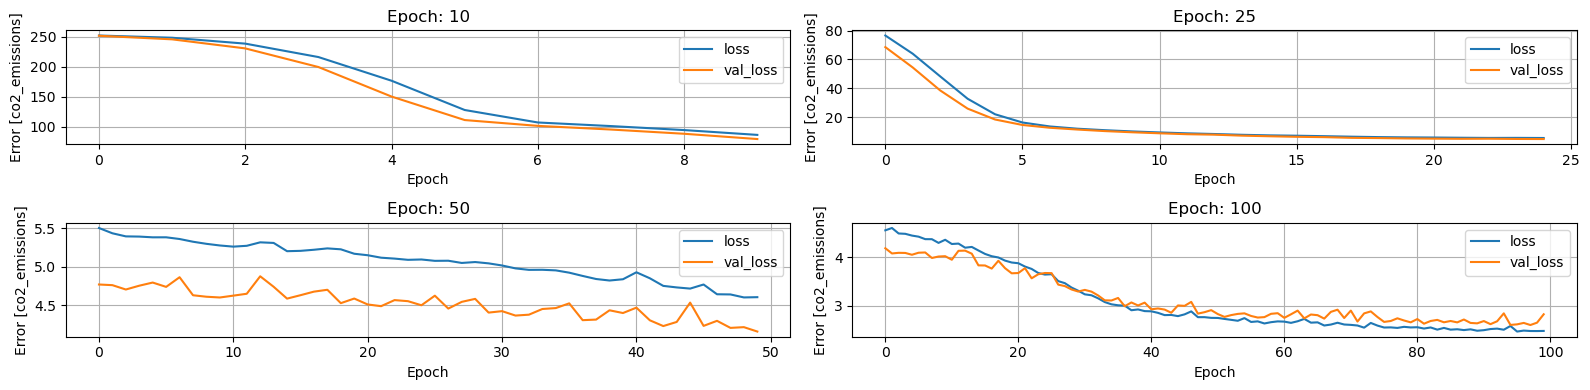

In [53]:
#Set figure size
fig = plt.figure(figsize=(16,4))
i = 1

#compare all the epochs and see the tendency as they increased
for x in [10, 25, 50, 100]: 
    history = dnn_model2.fit(X_train,
                            y_train, 
                            batch_size=100, 
                            verbose=0, 
                            epochs = x, 
                            validation_split=0.25
                            ) 
    
    ax = fig.add_subplot(2,2,i)
    plot_loss(history)
    title = "Epoch: " + str(x)
    ax.title.set_text(title)
    fig.tight_layout()
    
    i += 1
  

### 9.3.2 Compile model 2 using epochs = 25

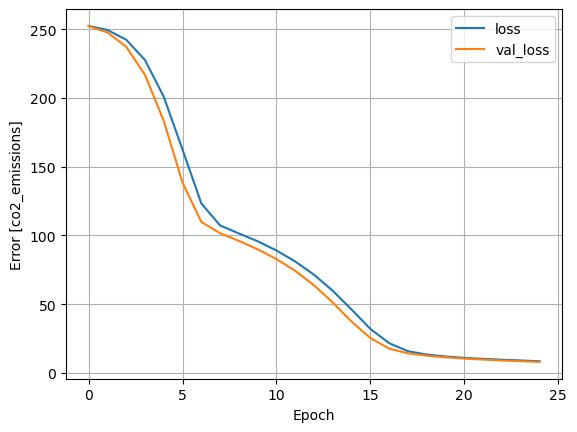

In [54]:
dnn_model2 = build_compile_model(normalizer)
history2 = dnn_model2.fit(X_train,
                          y_train, 
                          batch_size=100, 
                          verbose=0, 
                          epochs = 25, 
                          validation_split=0.25
                         ) 
plot_loss(history2)

## 9.4 Evaluation of the model dnn_model2

In [55]:
#Evaluation of the model
dnn_model2.evaluate(X_test, y_test)

48/48 [==============================] - 0s 2ms/step - loss: 7.8751


7.875134468078613

## 9.5 Get the predictions from dnn_model2

In [56]:
#Get the predictions
test_predictions2 = dnn_model2.predict(X_test).flatten()

test_predictions = dnn_model2.predict(X_test).flatten()
results_df = pd.DataFrame({'Predicted CO2 Emissions': test_predictions,'Actual CO2 Emissions':y_test.values.flatten()})
results_df.head(10)

48/48 [==============================] - 0s 1ms/step


,Predicted CO2 Emissions,Actual CO2 Emissions
0,218.612900,214.0
1,175.213409,172.0
2,168.764572,189.0
3,267.641144,270.0
4,184.557922,175.0
5,174.883942,181.0
6,198.464005,201.0
7,315.979004,324.0
8,306.522247,305.0
9,230.876373,240.0


## 9.6 Plot the actual vs the predicted CO2 Emissions values using DNN model 2

48/48 [==============================] - 0s 2ms/step - loss: 7.8751


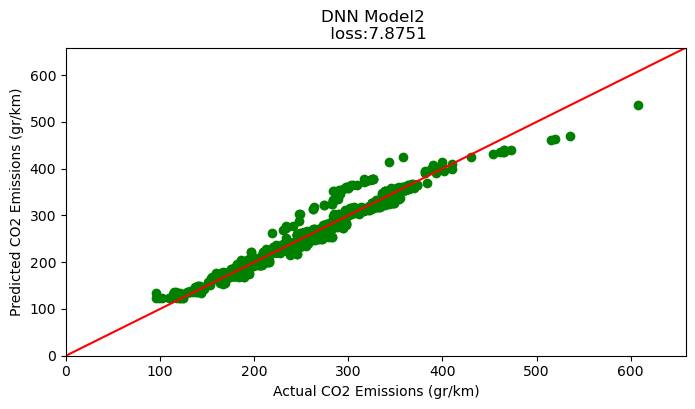

In [57]:
#Plot the actual vs the predicted
fig = plt.figure(figsize=(8, 4))
plt.scatter(y_test, test_predictions2, color = 'green')
plt.xlabel('Actual CO2 Emissions (gr/km)')
plt.ylabel('Predicted CO2 Emissions (gr/km)')
#Limit is dynamic and will be fixed based on max prediction plus a margin based on the minimum as to center the plot
lims = [0, max(test_predictions2) + min(test_predictions2)] 
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims, color='r')
plt.title(f'DNN Model2 \n loss:{dnn_model2.evaluate(X_test, y_test):.4f}')
plt.show()

## 9.7 Now that the dnn_model2 is defined, you can compile it.

In [58]:
dnn_model2.compile(optimizer=tf.keras.optimizers.RMSprop(),
                   loss='mean_squared_error',
                   metrics=['mean_squared_error'])


## 9.8 fit the keras dnn_model2 on the dataset with epochs = 25

In [59]:
history = dnn_model2.fit(X_train, y_train, epochs=25)

Epoch 1/25
143/143 [==============================] - 1s 2ms/step - loss: 157.0523 - mean_squared_error: 157.0523
Epoch 2/25
143/143 [==============================] - 0s 2ms/step - loss: 147.1022 - mean_squared_error: 147.1022
Epoch 3/25
143/143 [==============================] - 0s 2ms/step - loss: 143.1416 - mean_squared_error: 143.1416
Epoch 4/25
143/143 [==============================] - 0s 2ms/step - loss: 140.2870 - mean_squared_error: 140.2870
Epoch 5/25
143/143 [==============================] - 0s 2ms/step - loss: 139.3212 - mean_squared_error: 139.3212
Epoch 6/25
143/143 [==============================] - 0s 2ms/step - loss: 137.8489 - mean_squared_error: 137.8489
Epoch 7/25
143/143 [==============================] - 0s 2ms/step - loss: 136.3997 - mean_squared_error: 136.3997
Epoch 8/25
143/143 [==============================] - 0s 2ms/step - loss: 134.6829 - mean_squared_error: 134.6829
Epoch 9/25
143/143 [==============================] - 0s 2ms/step - loss: 133.9491 - mea

## 9.9 Based on regression models score, employ the best model

In [60]:
sorted_cv_results = dict(sorted(cv_results.items(), key=lambda item: item[1], reverse=True))
sorted_cv_results

{'Random Forest Regressor': 0.9883405132392156,
 'Ridge Regresor': 0.9514537646640882,
 'LinearRegressor': 0.9514532448967163,
 'Lasso Regressor': 0.9514463252104447}

## 9.10 Use a RandomForestRegressor to fit the y_pred and y_test

RMSE: 3.0752361315652794
R2: 0.9973835239948019


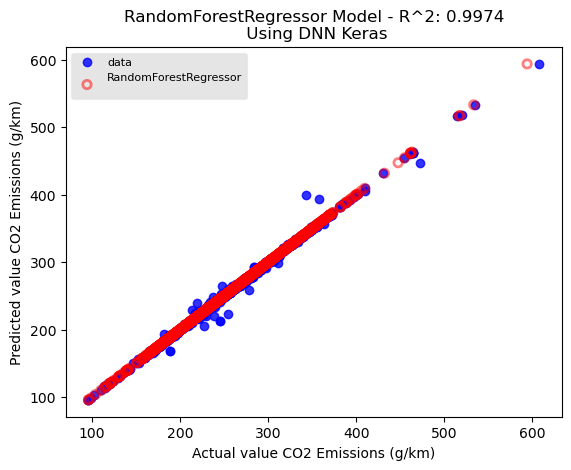

In [61]:
# Use a RandomForestRegressor to fit the y_pred and y_test
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)  

# regressor.fit(y_test.reshape(-1,1), y_pred)  
rf_reg.fit(X_train, y_train)
y_fit = rf_reg.predict(X_test) 
y_pred = rf_reg.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred)**0.5
print("RMSE:", rmse)

# Calculate R2
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

#Plotting rf model
plt.scatter(y_test, y_pred, alpha=.8, color='b', label='data') #alpha helps to show overlapping data
plt.scatter(y_pred, y_fit, alpha=.5, color='red', facecolors='none', linewidth=2, label = 'RandomForestRegressor\n') 
plt.xlabel('Actual value CO2 Emissions (g/km)')
plt.ylabel('Predicted value CO2 Emissions (g/km)')
plt.legend(fontsize = 8, facecolor = 'gray', framealpha=0.2)
plt.title(f'RandomForestRegressor Model - R^2: {r2:.4f}\n Using DNN Keras')
#plt.title('RandomForestRegressor Model using Keras')
plt.show()

# 10 Out-of-sample Predictions

## 10.1 Predict CO2 Emissions in unseen data (newdata)

### 10.1.1 Original dataset vehicles from 2017 to 2022

In [62]:
# Best Feature Select Model (RandomForestClassifier)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6061 entries, 0 to 6060
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine_size   6061 non-null   float64
 1   city_l_100km  6061 non-null   float64
 2   hwy_l_100km   6061 non-null   float64
 3   comb_l_100km  6061 non-null   float64
 4   co2_rating    6061 non-null   int64  
 5   smog_rating   6061 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 284.2 KB


### 10.1.2 New dataset vehicles from 2023

The new dataset has 37 record from vehicles model 2023

In [63]:
newdata = pd.read_csv('newdata.csv')
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           38 non-null     int64  
 1   Model          38 non-null     object 
 2   Make           38 non-null     object 
 3   Type           38 non-null     object 
 4   Type Vehicle   38 non-null     object 
 5   Class          38 non-null     object 
 6   Engine Size    38 non-null     float64
 7   Cylinders      38 non-null     int64  
 8   Transmission   38 non-null     object 
 9   Fuel Type      38 non-null     object 
 10  City L 100km   38 non-null     float64
 11  Hwy L 100km    38 non-null     float64
 12  Comb L 100km   38 non-null     float64
 13  cost_per_year  38 non-null     int64  
 14  CO2 Rating     38 non-null     int64  
 15  Smog Rating    38 non-null     int64  
dtypes: float64(4), int64(5), object(7)
memory usage: 4.9+ KB


### 10.1.3 Wrangling data

In [64]:
#Column name manipulation
newdata.columns = newdata.columns.str.lower() #Change all column names into lowercase
newdata.columns = newdata.columns.map(lambda x: x.replace(' ', '_').replace('-','_')) #Replace whitespace in column names into underscore
newdata.columns

Index(['year', 'model', 'make', 'type', 'type_vehicle', 'class', 'engine_size',
       'cylinders', 'transmission', 'fuel_type', 'city_l_100km', 'hwy_l_100km',
       'comb_l_100km', 'cost_per_year', 'co2_rating', 'smog_rating'],
      dtype='object')

In [65]:
### Subset with the variables employed in the original model performaced
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           38 non-null     int64  
 1   model          38 non-null     object 
 2   make           38 non-null     object 
 3   type           38 non-null     object 
 4   type_vehicle   38 non-null     object 
 5   class          38 non-null     object 
 6   engine_size    38 non-null     float64
 7   cylinders      38 non-null     int64  
 8   transmission   38 non-null     object 
 9   fuel_type      38 non-null     object 
 10  city_l_100km   38 non-null     float64
 11  hwy_l_100km    38 non-null     float64
 12  comb_l_100km   38 non-null     float64
 13  cost_per_year  38 non-null     int64  
 14  co2_rating     38 non-null     int64  
 15  smog_rating    38 non-null     int64  
dtypes: float64(4), int64(5), object(7)
memory usage: 4.9+ KB


In [66]:
#features selected in new dataframe
X_new = newdata[['engine_size', 'city_l_100km', 'hwy_l_100km', 'comb_l_100km', 'co2_rating', 'smog_rating']]
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine_size   38 non-null     float64
 1   city_l_100km  38 non-null     float64
 2   hwy_l_100km   38 non-null     float64
 3   comb_l_100km  38 non-null     float64
 4   co2_rating    38 non-null     int64  
 5   smog_rating   38 non-null     int64  
dtypes: float64(4), int64(2)
memory usage: 1.9 KB


## 10.2 Using DNN Model to get predicted CO2 Emissions values

In [67]:
#Get the predictions
X_new_predictions = dnn_model2.predict(X_new).flatten()
results_df = pd.DataFrame({'DNN model Predicted CO2 Emissions': X_new_predictions})
results_df.head(5)

2/2 [==============================] - 0s 3ms/step


,DNN model Predicted CO2 Emissions
0,190.007965
1,217.546936
2,270.959503
3,194.714493
4,282.318848


## 10.3 Using Random Forest Regressor to get predicted CO2 Emissions Values

In [68]:
# Use the trained regressor to make predictions
# Predict the CO2 emissions
y_pred_new = rf_reg.predict(X_new)

## 10. 4 Append to the newdataset those predicted values got from DNN and RandonForestRegressor models

In [69]:
# Append the y_pred_new to the newdata dataset
newdata["CO2_emissions_pred_RF"] = y_pred_new
newdata["CO2_emissions_pred_DNN"] = X_new_predictions

# Print the updated dataset
newdata.head(5)

,year,model,make,type,type_vehicle,class,engine_size,cylinders,transmission,fuel_type,city_l_100km,hwy_l_100km,comb_l_100km,cost_per_year,co2_rating,smog_rating,CO2_emissions_pred_RF,CO2_emissions_pred_DNN
0,2023,Integra,Acura,cars,Fuel,L,1.5,4,AV7,Z,7.9,6.3,7.2,2088,6,7,170.997500,190.007965
1,2023,Giulia,Alfa Romeo,cars,Fuel,M,2.0,4,A8,Z,10.0,7.2,8.7,2523,5,5,209.110556,217.546936
2,2023,DB11 V8,Aston Martin,cars,Fuel,I,4.0,8,A8,Z,13.0,9.8,11.5,3335,4,5,271.030000,270.959503
3,2023,A3 40 TFSI quattro,Audi,cars,Fuel,S,2.0,4,AM7,X,8.7,6.8,7.9,1975,6,7,184.810893,194.714493
4,2023,Continental GT,Bentley,cars,Fuel,S,4.0,8,AM8,Z,15.3,10.4,13.1,3799,4,3,289.611810,282.318848


# 11. Developing Initial Hypotheses

## 11. 1 The engine size and transmission will emit more CO2

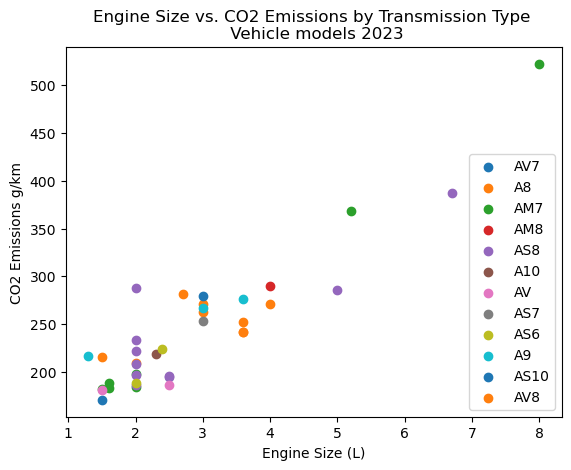

In [70]:
fig, ax = plt.subplots()
transmission_types = newdata['transmission'].unique()
for transmission_type in transmission_types:
    subset = newdata[newdata['transmission'] == transmission_type]
    ax.scatter(subset['engine_size'], subset['CO2_emissions_pred_RF'], label=transmission_type)
ax.legend()
ax.set_xlabel('Engine Size (L)')
ax.set_ylabel('CO2 Emissions g/km')
ax.set_title('Engine Size vs. CO2 Emissions by Transmission Type \n Vehicle models 2023')
plt.show()

Regarding to our models. We found that the engine size has a positive correlation with CO2 emissions. CO2 emissions from engines larges than 5 litres, for example, can exceed 300 g/km. This means that the larger the engine size, the greater the amount of CO2. However, there appears to be no pattern in vehicles transmission related to egine size and CO2 emissions, as the same reference transmission can be found in cars with 1-3 litre engines as wellas engines up to 8 litres. 

## 11.2 Comparing original dataset with predicted dataset for a Bugatti Model

### 11.2.1 Looking up CO2 emissions from Bugatti Models 2022

In [71]:
#Original dataset fuel consumption 2017-2022
original_df = pd.read_csv('Fuel_Consumption_2012_2022.csv')
Bugatti_orig_df = original_df.loc[lambda x: (x['Make'] == 'Bugatti') & (x['Year'] == 2022), ['Year', 'Model', 'Make', 'Engine Size', 'CO2 Emissions']]
Bugatti_orig_df

,Year,Model,Make,Engine Size,CO2 Emissions
253,2022,Chiron,Bugatti,8.0,522
254,2022,Chiron Pur Sport,Bugatti,8.0,608
255,2022,Chiron Super Sport,Bugatti,8.0,608


### 11.2.2 Looking up CO2 emissions from Bugatti Model 2023

In [72]:
# New dataset for vehicles model 2023
bugatti_pred_df = newdata.loc[lambda x: (x['make'] == 'Bugatti') & (x['year'] == 2023), ['year', 'model', 'make', 'engine_size', 'CO2_emissions_pred_RF', 'CO2_emissions_pred_DNN']]
bugatti_pred_df

,year,model,make,engine_size,CO2_emissions_pred_RF,CO2_emissions_pred_DNN
6,2023,Chiron,Bugatti,8.0,521.86,493.184204


Our models made a good performance for predict CO2 emissions values  

## 11.3 The fuel types emit CO2 as differential ways

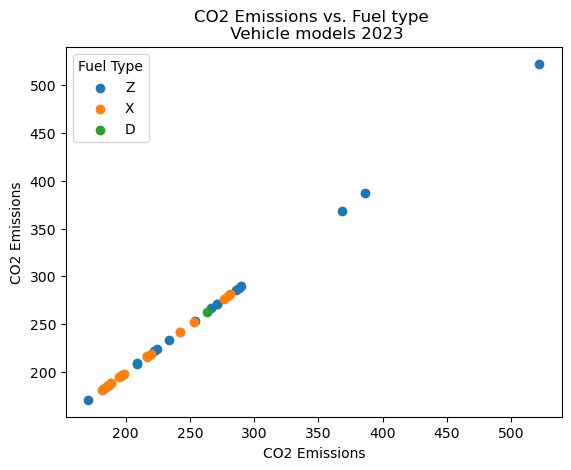

In [73]:
fig, ax = plt.subplots()
transmission_types = newdata['fuel_type'].unique()
for transmission_type in transmission_types:
    subset = newdata[newdata['fuel_type'] == transmission_type]
    ax.scatter(subset['CO2_emissions_pred_RF'], subset['CO2_emissions_pred_RF'], label=transmission_type)
ax.legend(title = 'Fuel Type')
ax.set_xlabel('CO2 Emissions')
ax.set_ylabel('CO2 Emissions')
ax.set_title('CO2 Emissions vs. Fuel type \n Vehicle models 2023')
plt.show()

We have observed that there is a discrepancy between different fuel types and the amount of CO2 emissions they produce. To illustrate, vehicles that utilize premium gasoline (Z) have the ability to discharge CO2 over a wide range, while regular gasoline (X) generates fewer CO2 emissions. This variation could be attributed to certain vehicles that were examined belonging to the luxury category, which mandates the use of premium gasoline because of their specific engine technology and size.

## 11.4 Vehicles with low CO2 rating emit more CO2 emissions than those vehicles with high CO2 rating

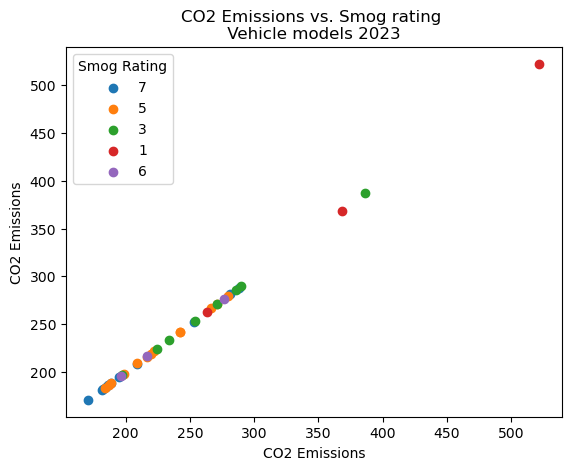

In [74]:
fig, ax = plt.subplots()
transmission_types = newdata['smog_rating'].unique()
for transmission_type in transmission_types:
    subset = newdata[newdata['smog_rating'] == transmission_type]
    ax.scatter(subset['CO2_emissions_pred_RF'], subset['CO2_emissions_pred_RF'], label=transmission_type)
ax.legend(title = 'Smog Rating')
ax.set_xlabel('CO2 Emissions')
ax.set_ylabel('CO2 Emissions')
ax.set_title('CO2 Emissions vs. Smog rating \n Vehicle models 2023 ')
plt.show()

According to our models, vehicles that have lower smog ratings tend to produce higher levels of CO2 emissions. This indicates that the vehicles with the lowest smog ratings actually have the highest levels of CO2 emissions. For instance, cars with smog ratings of 1 and 3 emit more than 350g of CO2 per kilometer, whereas most vehicles with the highest smog ratings produce CO2 emissions below 300g per kilometer.

In [75]:
print('--END--')

--END--
